<a href="https://colab.research.google.com/github/kozen88/ProgettoIcon2023/blob/main/Tecniche_di_campionamento_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecniche per il trattamento dell'imbalance learning
Inizieremo a trattare il problema dell'apprendimento di un data set sbilanciato con le principali tecniche note in letterature.

- Undersampling or Downsampling
- OverSampling or Upsampling
- Approccio misto Under&Over sampling
- Cost Sensitive Learning
- Apprendimento non supervisionato
- Ensemble learning

## Tecniche basate sul Campionamento
Iniziamo a prendere visione delle tecniche di campionamento che cercano di aumentare o diminuire gli esempi a disposizione per cercare di bilanciare le due classi.

In [1]:
from ast import increment_lineno
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, f1_score, fbeta_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df_impiegati = pd.read_excel('Data_set_impiegati_one_hot_enc.xlsx')

### SMOTEENN

In [3]:
from imblearn.combine import SMOTEENN

In [4]:
# Andiamo a bilanciare il dataset con lo SMOTEENN approccio ibrido dato da SMOTE + ENN
X = pd.read_excel('Impiegati_OHE_std_withoutTarget.xlsx')
y = df_impiegati["left"]

sme = SMOTEENN(random_state=0, sampling_strategy=0.9)
X_res, y_res = sme.fit_resample(X, y)

In [5]:
# Adesso dopo aver usato lo SMOTEENN andiamo a ricostruire il dataset in modo da aver
# un nuovo dataset bilanciato con tecnica ibrida SMOTEENN
data_balanced_smoteenn = X_res
data_balanced_smoteenn["left"] = y_res
data_balanced_smoteenn.drop_duplicates()
data_balanced_smoteenn.to_csv("Data_impiegati_smoteenn.csv", index=False)

In [6]:
data_balanced_smoteenn

satisfaction_level  last_evaluation  number_project  \
0               -0.132062         0.139622        0.159788   
1                0.833258        -0.269343       -1.462863   
2               -0.654943        -0.152496        0.971113   
3                0.672371         0.607012        0.971113   
4               -0.494057        -0.678309       -0.651538   
...                   ...              ...             ...   
20531           -0.936495        -1.478253       -1.462863   
20532           -0.759597        -0.853580       -1.462863   
20533           -2.030044         0.373317        1.782438   
20534           -0.920184        -1.046217       -1.462863   
20535           -2.102922         1.240807        1.782438   

       average_montly_hours  time_spend_company  Work_accident  \
0                  0.279320           -0.341235      -0.411165   
1                  0.019016           -0.341235      -0.411165   
2                 -0.161196           -0.341235      -0.411165   
3                  0.920071           -0.341235      -0.411165   
4                  0.259297           -1.026126      -0.411165   
...                     ...                 ...            ...   
20531             -0.954441           -0.341235      -0.411165   
20532             -1.314682           -0.341235      -0.411165   
20533              0.914422            0.343655      -0.411165   
20534             -1.458936           -0.341235      -0.411165   
20535              1.531837            1.028546      -0.411165   

       promotion_last_5years  department_RandD  department_accounting  \
0                  -0.147412         -0.235321              -0.232148   
1                  -0.147412         -0.235321              -0.232148   
2                  -0.147412         -0.235321              -0.232148   
3                  -0.147412         -0.235321              -0.232148   
4                  -0.147412         -0.235321              -0.232148   
...                      ...               ...                    ...   
20531              -0.147412         -0.235321              -0.232148   
20532              -0.147412         -0.235321              -0.232148   
20533              -0.147412         -0.235321              -0.232148   
20534              -0.147412         -0.235321              -0.232148   
20535              -0.147412         -0.235321              -0.232148   

       department_human_resources  department_management  \
0                       -0.227647              -0.209391   
1                       -0.227647              -0.209391   
2                       -0.227647              -0.209391   
3                       -0.227647              -0.209391   
4                       -0.227647              -0.209391   
...                           ...                    ...   
20531                   -0.227647              -0.209391   
20532                   -0.227647              -0.209391   
20533                   -0.227647              -0.209391   
20534                   -0.227647              -0.209391   
20535                   -0.227647              -0.209391   

       department_marketing  department_product_mng  department_sales  \
0                 -0.246322               -0.252953          1.619551   
1                 -0.246322               -0.252953          1.619551   
2                 -0.246322               -0.252953          1.619551   
3                 -0.246322               -0.252953          1.619551   
4                 -0.246322               -0.252953          1.619551   
...                     ...                     ...               ...   
20531             -0.246322               -0.252953          1.619551   
20532             -0.246322                3.953303         -0.617455   
20533             -0.246322               -0.252953         -0.617455   
20534             -0.246322               -0.252953          1.619551   
20535             -0.246322               -0.252953          1.61955

In [ ]:
excel_file = 'Data_impiegati_smoteen.xlsx'
data_balanced_smoteenn.to_excel(excel_file, index=False)

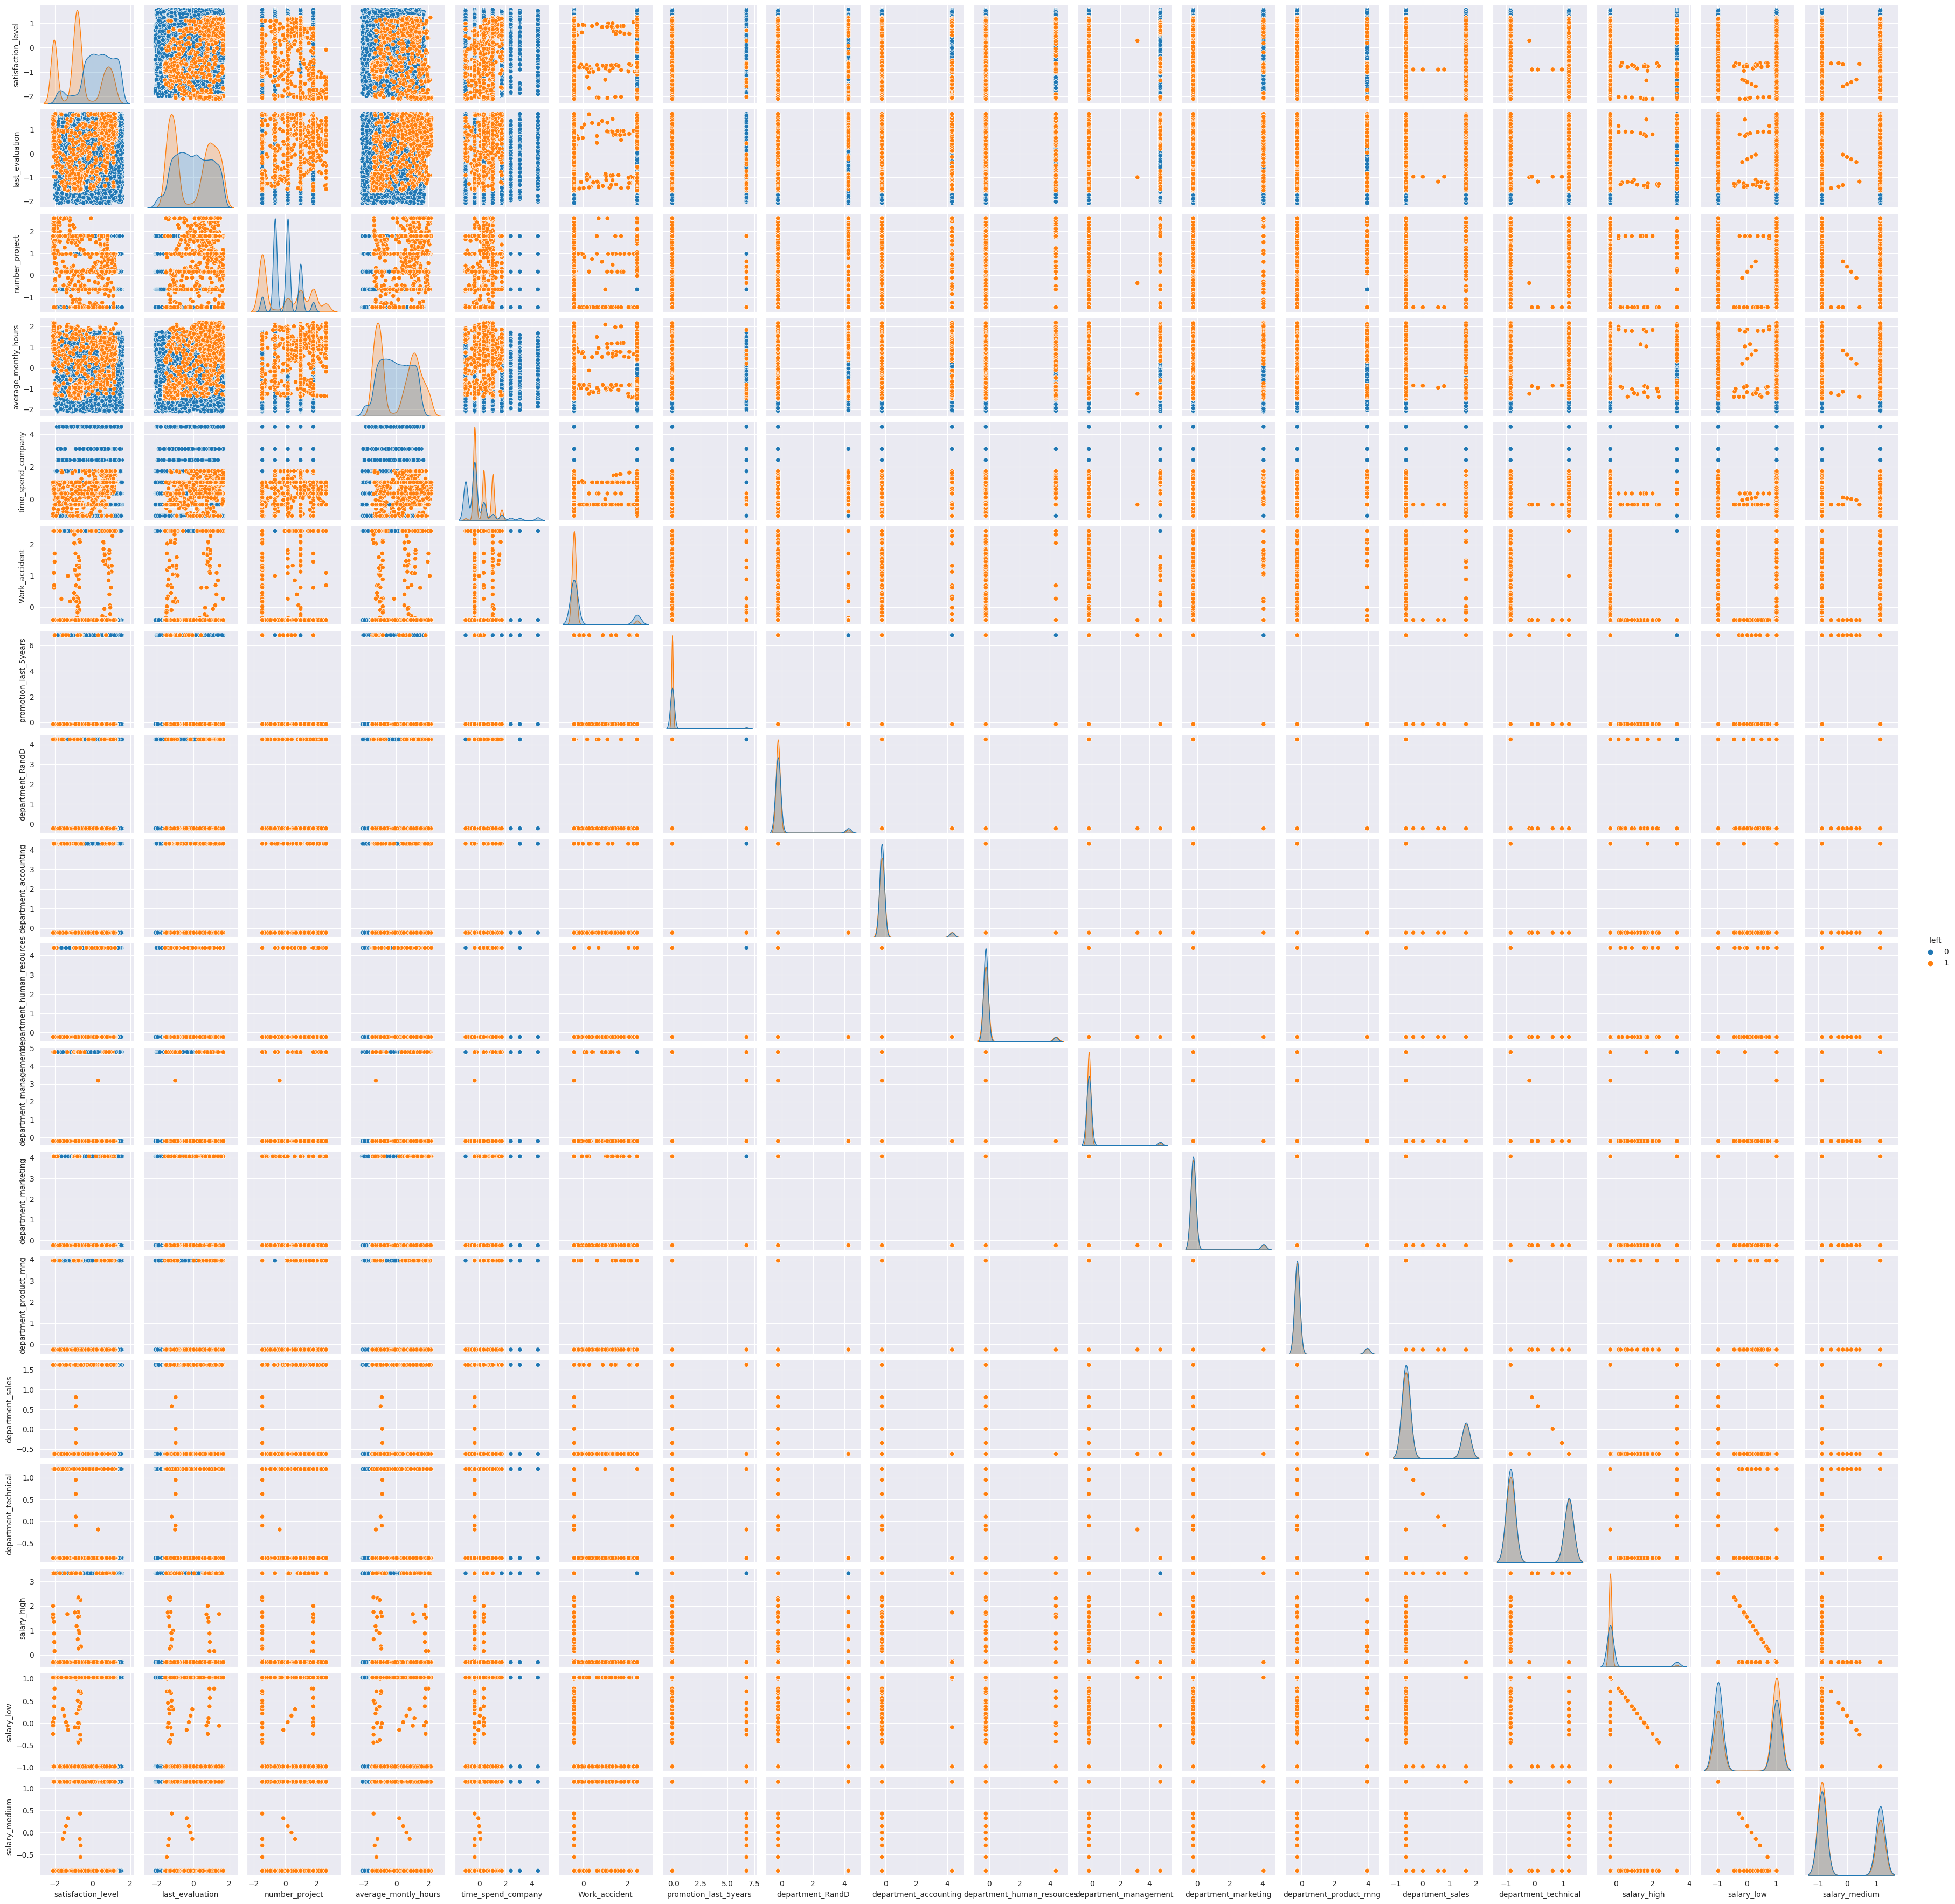

In [ ]:
# Prendiamo visualizzazione di quello che è successo hai dati dopo la tecni di SMOTEENN
data_balanced_smoteenn_plot = sns.pairplot(data_balanced_smoteenn, hue='left', height=2)

In [7]:
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel", alpha=0.8)
    plt.xlabel('Classe\nRestano=0  vs  Lasciano=1')
    plt.ylabel('Numero di impiegati per classe')
    plt.title(title)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

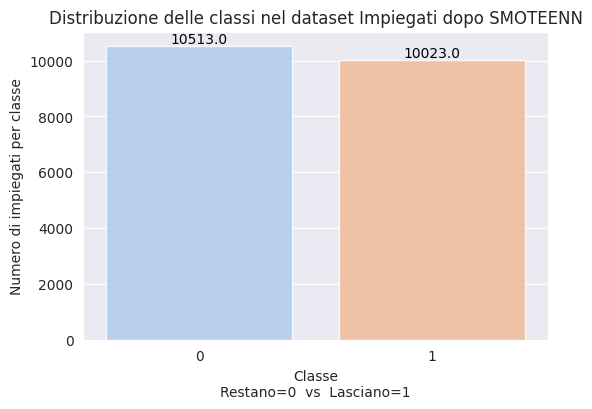

In [8]:
# andiamo a definire su quale colonna eseguire il conteggio degli esempi per classe
class_counts_smoteenn = data_balanced_smoteenn['left'].value_counts()

# Crea un barplot per mostrare lo sbilanciamento tra le classi dopo lo SMOOTEEEN
plot_class_distribution(class_counts_smoteenn, 'Distribuzione delle classi nel dataset Impiegati dopo SMOTEENN')

In [9]:
def plot_pie_chart(class_counts, title, legend_labels, startangle=40, fontsize=12, fontweight='bold'):
    plt.figure(figsize=(6, 6))
    colors = sns.color_palette('pastel')
    sns.set_palette(colors)

    def func(pct, allvalues):
        absolute = int(pct / 100. * np.sum(allvalues))
        return f"{pct:.2f}%\n({absolute:,d})"

    explode = (0.02,) + (0,) * (len(class_counts) - 1)  # Add space only to the first slice

    plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=startangle,
            textprops={'fontsize': fontsize, 'fontweight': fontweight}, explode=explode, shadow=True)

    plt.title(title)
    plt.axis('equal')

    plt.legend(legend_labels, loc='lower right')  # Custom legend

    plt.show()

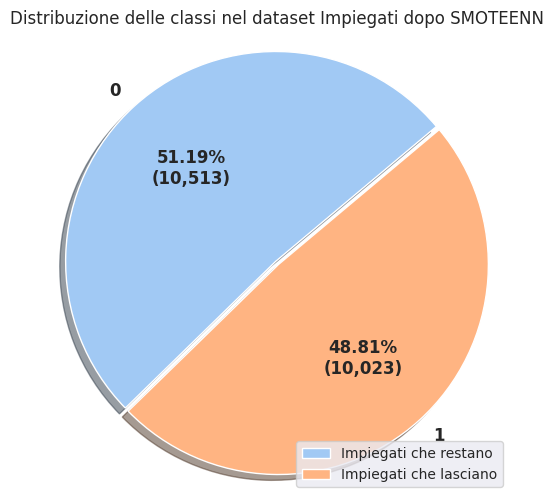

In [10]:
legend_labels = ['Impiegati che restano', 'Impiegati che lasciano']
plot_pie_chart(class_counts_smoteenn, 'Distribuzione delle classi nel dataset Impiegati dopo SMOTEENN', legend_labels, startangle=40, fontsize=12, fontweight='bold')

### Addastramento di modelli di machine learning dopo SMOTEENN
Andremo ad addestrare due modelli da confrontare tra di loro per vedere come si comportano su questo nuovo data set e quanto lo SMOTEENN ha potuto incidere sul miglioramento o meno dell'apprendimento.

In [18]:
# Utilizziamo il data set creato con SMOTEENN e lo dividiamo in input e target
X_smoteenn = data_balanced_smoteenn.drop(columns=["left"])
y_smoteenn = data_balanced_smoteenn["left"]

In [23]:
# Andiamo a suddividere il dataset in train set e test sewt con un hold-out 70:30
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn  = train_test_split (X_smoteenn , y_smoteenn , test_size=0.3, random_state=110)

# verifica del hold out
print("X_train shape: ", X_train_smoteenn.shape)
print("X_test shape: ", X_test_smoteenn.shape)
print("y_train.shape: ", y_train_smoteenn.shape)
print("y_test shape: ", y_test_smoteenn.shape)

X_train shape:  (14375, 18)
X_test shape:  (6161, 18)
y_train.shape:  (14375,)
y_test shape:  (6161,)


In [24]:
# istanziazzione dei modelli da mettere a confronto logistic regression vs gaussian naive bayes
log_reg = LogisticRegression()
gauNb = GaussianNB()

# adestramento base su hold-out per regressione logistica
log_reg.fit(X_train_smoteenn, y_train_smoteenn)
pred_log_reg = log_reg.predict(X_test_smoteenn)

# addestramento base su hold-out per gaussian naive bayes
gauNb.fit(X_train_smoteenn, y_train_smoteenn)
pred_gauNb = gauNb.predict(X_test_smoteenn)

In [25]:
print("___________LOGISTIC REGRESSION ON SMOTEENN______________")
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test_smoteenn,pred_log_reg))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test_smoteenn, pred_log_reg))

___________LOGISTIC REGRESSION ON SMOTEENN______________
------------------------Accuracy------------------------

0.7917545852945951

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3136
           1       0.78      0.79      0.79      3025

    accuracy                           0.79      6161
   macro avg       0.79      0.79      0.79      6161
weighted avg       0.79      0.79      0.79      6161



In [90]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', fontsize=22, title_color='#660000'):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Calcola le percentuali
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap='OrRd')  # Utilizza fmt=".2%" per visualizzare le percentuali con due decimali
    plt.title(title, fontsize=fontsize, color=title_color)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


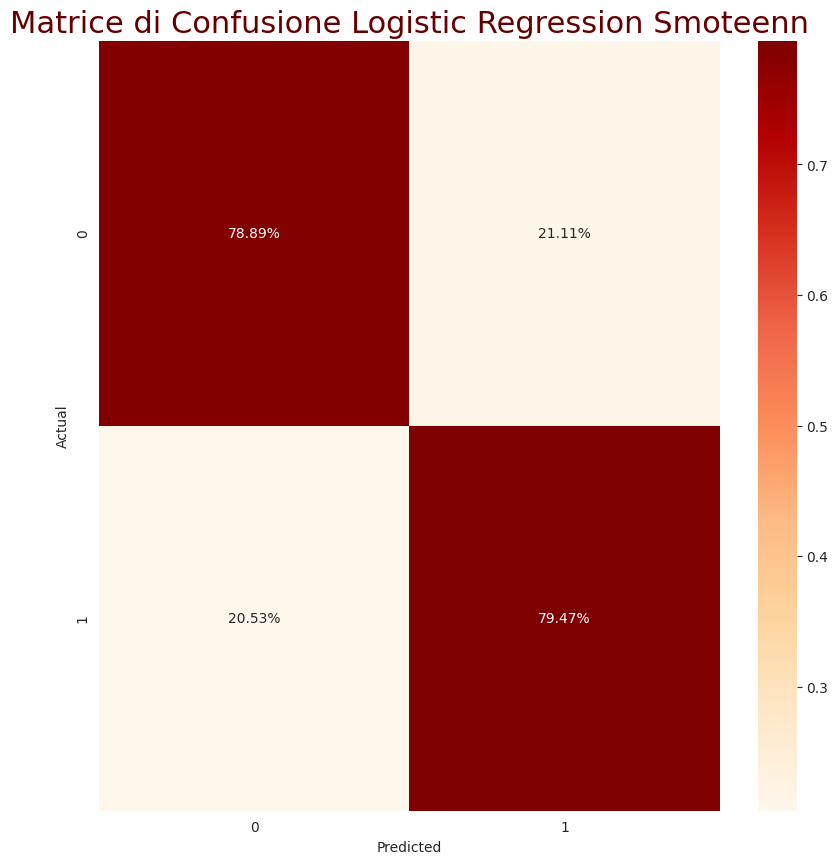

In [91]:
plot_confusion_matrix(y_test_smoteenn, pred_log_reg, "Matrice di Confusione Logistic Regression Smoteenn")

In [28]:
print("____________GAUSSIAN NAIVE BAYES ON SMOTEENN____________")
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test_smoteenn, pred_gauNb))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test_smoteenn, pred_gauNb))

____________GAUSSIAN NAIVE BAYES ON SMOTEENN____________
------------------------Accuracy------------------------

0.6520045447167667

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.80      0.43      0.55      3136
           1       0.60      0.89      0.71      3025

    accuracy                           0.65      6161
   macro avg       0.70      0.66      0.63      6161
weighted avg       0.70      0.65      0.63      6161



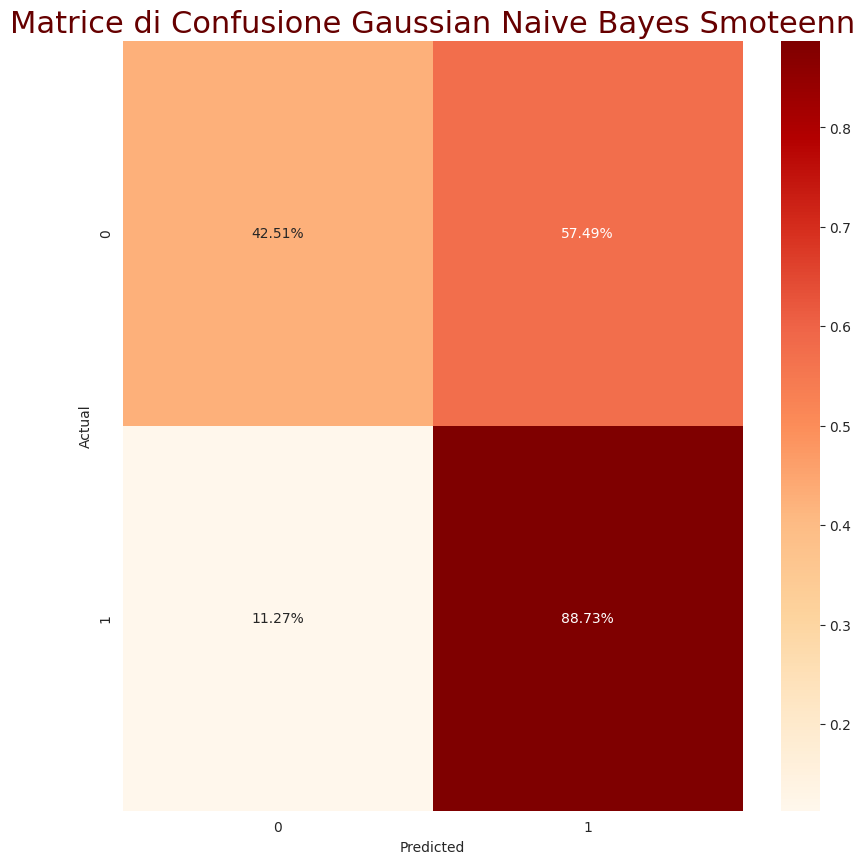

In [92]:
plot_confusion_matrix(y_test_smoteenn, pred_gauNb, "Matrice di Confusione Gaussian Naive Bayes Smoteenn")

Curva di ROC tra i due modelli per confrontare il migliore modello

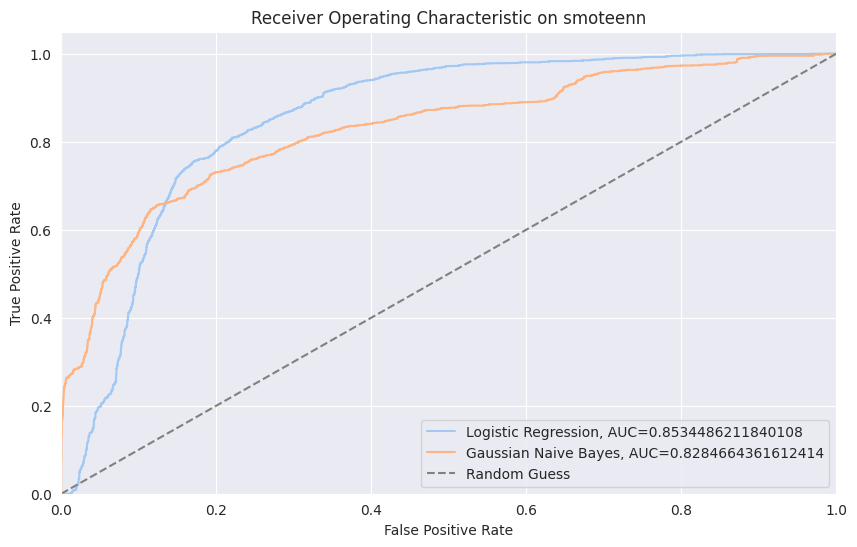

In [31]:
# Calcola i punteggi delle probabilità positive
pred_log_reg_positive =log_reg.predict_proba(X_test_smoteenn)[:, 1]
pred_gauNb_positive = gauNb.predict_proba(X_test_smoteenn)[:, 1]

# Calcola le curve ROC e gli AUC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_smoteenn , pred_log_reg_positive)
auc_log_reg = roc_auc_score(y_test_smoteenn , pred_log_reg_positive)

fpr_gauNb, tpr_gauNb, _ = roc_curve(y_test_smoteenn , pred_gauNb_positive)
auc_gauNb = roc_auc_score(y_test_smoteenn, pred_gauNb_positive)

# Crea il grafico ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label="Logistic Regression, AUC=" + str(auc_log_reg))
plt.plot(fpr_gauNb, tpr_gauNb, label="Gaussian Naive Bayes, AUC=" + str(auc_gauNb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic on smoteenn')
plt.legend(loc='lower right')
plt.show()

#### Ottimizzazione dei modelli su smoteenn e confronto

In [32]:
# preparazione della griglia di parametri da testare per il logistic regression
param_grid_log_reg = {
    'penalty': ['l1', 'l2'],          # Tipo di norma di regolarizzazione
    'C': [0.001, 0.01, 0.1, 1, 10],   # Parametro di regolarizzazione (1/alpha)
    'solver': ['liblinear', 'saga'],  # Algoritmo di ottimizzazione
    'max_iter': [30, 50, 100, 150, 200, 300, 500],      # Numero massimo di iterazioni
    'random_state': [110],             # Seme per la riproducibilità
}

In [33]:
# preparazione dei parametri da ottimizzare per il gaussian naive bayes
param_grid_gauNb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

In [34]:
kf5 = StratifiedKFold(n_splits=5, shuffle=False)
kf10 = StratifiedKFold(n_splits=10, shuffle=False)
kf15 = StratifiedKFold(n_splits=15, shuffle=False)

In [38]:
grid_log_reg = GridSearchCV(LogisticRegression(), param_grid=param_grid_log_reg, cv=kf10, scoring='recall').fit(X_train_smoteenn , y_train_smoteenn )
print('Best parameters:',grid_log_reg.best_params_)
print('Best score:', grid_log_reg.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 0.1, 'max_iter': 30, 'penalty': 'l2', 'random_state': 110, 'solver': 'liblinear'}
Best score: 0.7972272634375639


In [49]:
pred_grid_log_reg  = grid_log_reg.predict(X_test_smoteenn)


print("____LOGISTIC REGRESSION BEST PARAM KF=15 ON SMOTEENN_____")
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test_smoteenn, pred_grid_log_reg ))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test_smoteenn, pred_grid_log_reg ))

____LOGISTIC REGRESSION BEST PARAM KF=15 ON SMOTEENN_____
------------------------Accuracy------------------------

0.7914299626683979

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3136
           1       0.78      0.79      0.79      3025

    accuracy                           0.79      6161
   macro avg       0.79      0.79      0.79      6161
weighted avg       0.79      0.79      0.79      6161



In [45]:
grid_gauNb = GridSearchCV(GaussianNB(), param_grid=param_grid_gauNb, cv=kf15, scoring='recall').fit(X_train_smoteenn , y_train_smoteenn )
print('Best parameters:',grid_gauNb.best_params_)
print('Best score:', grid_gauNb.best_score_)

Best parameters: {'var_smoothing': 0.01}
Best score: 0.8859698621156561


In [46]:
pred_grid_gauNb = grid_gauNb.predict(X_test_smoteenn)


print("____GAUSSIAN NAIVE BAYES BEST PARAM KF=15 ON SMOTEENN____")
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test_smoteenn, pred_grid_gauNb ))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test_smoteenn, pred_grid_gauNb))

____GAUSSIAN NAIVE BAYES BEST PARAM KF=15 ON SMOTEENN____
------------------------Accuracy------------------------

0.6526537899691609

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.80      0.43      0.56      3136
           1       0.60      0.89      0.72      3025

    accuracy                           0.65      6161
   macro avg       0.70      0.66      0.64      6161
weighted avg       0.70      0.65      0.63      6161



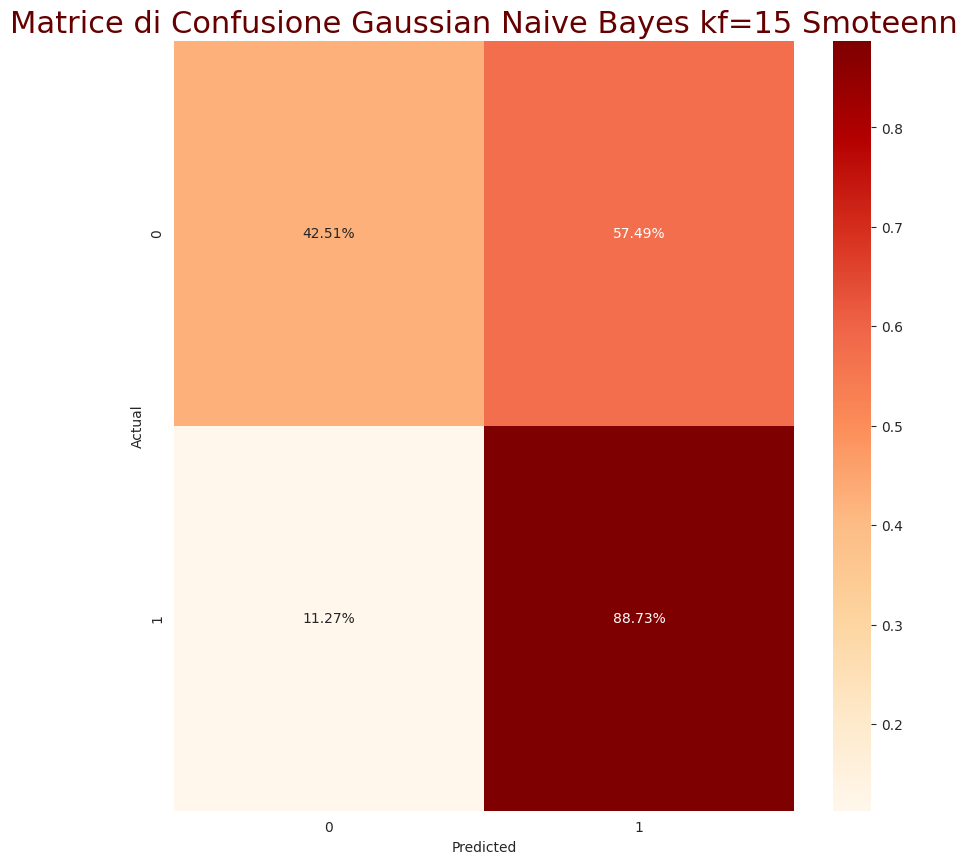

In [93]:
plot_confusion_matrix(y_test_smoteenn, pred_gauNb, "Matrice di Confusione Gaussian Naive Bayes kf=15 Smoteenn")

In [50]:
best_param_LR = grid_log_reg.best_params_
best_param_GNB = grid_gauNb.best_params_

In [52]:
log_reg_cv_score = cross_val_score(LogisticRegression(**best_param_LR), X_train_smoteenn, y_train_smoteenn, cv=kf5, scoring='recall')
print("Logistic Regrtession Best param Cross Validation Recall scores are: {}".format(log_reg_cv_score))
print("Logistic Regression Best param Average Cross Validation Recall score: {}".format(log_reg_cv_score.mean()))

Logistic Regrtession Best param Cross Validation Recall scores are: [0.78714286 0.79285714 0.79571429 0.81701215 0.79342387]
Logistic Regression Best param Average Cross Validation Recall score: 0.7972300622893904


In [53]:
gauNb_cv_score = cross_val_score(GaussianNB(**best_param_GNB), X_train_smoteenn, y_train_smoteenn, cv=kf10, scoring='recall')
print("Gaussian Naive Bayes Best param Cross Validation Recall scores are: {}".format(gauNb_cv_score ))
print("Gaussian Naive Bayes Best param Average Cross Validation Recall score: {}".format(gauNb_cv_score .mean()))

Gaussian Naive Bayes Best param Cross Validation Recall scores are: [0.9        0.87428571 0.88       0.86857143 0.89714286 0.88571429
 0.9        0.88714286 0.87410587 0.89270386]
Gaussian Naive Bayes Best param Average Cross Validation Recall score: 0.8859666871040263


### ADASYN

In [11]:
from imblearn.over_sampling import ADASYN

In [12]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

In [13]:
# Adesso dopo aver usato lo ADASYN andiamo a ricostruire il dataset in modo da aver
# un nuovo dataset bilanciato con tecnica di oversampling data da ADASYN
data_balance_adasyn = X_adasyn
data_balance_adasyn["left"] = y_adasyn
data_balance_adasyn.drop_duplicates()
data_balance_adasyn.to_csv("Data_impiegati_adasyn.csv", index=False)

In [ ]:
excel_file_2 = 'Data_impiegati_adasyn.xlsx'
data_balance_adasyn.to_excel(excel_file_2, index=False)

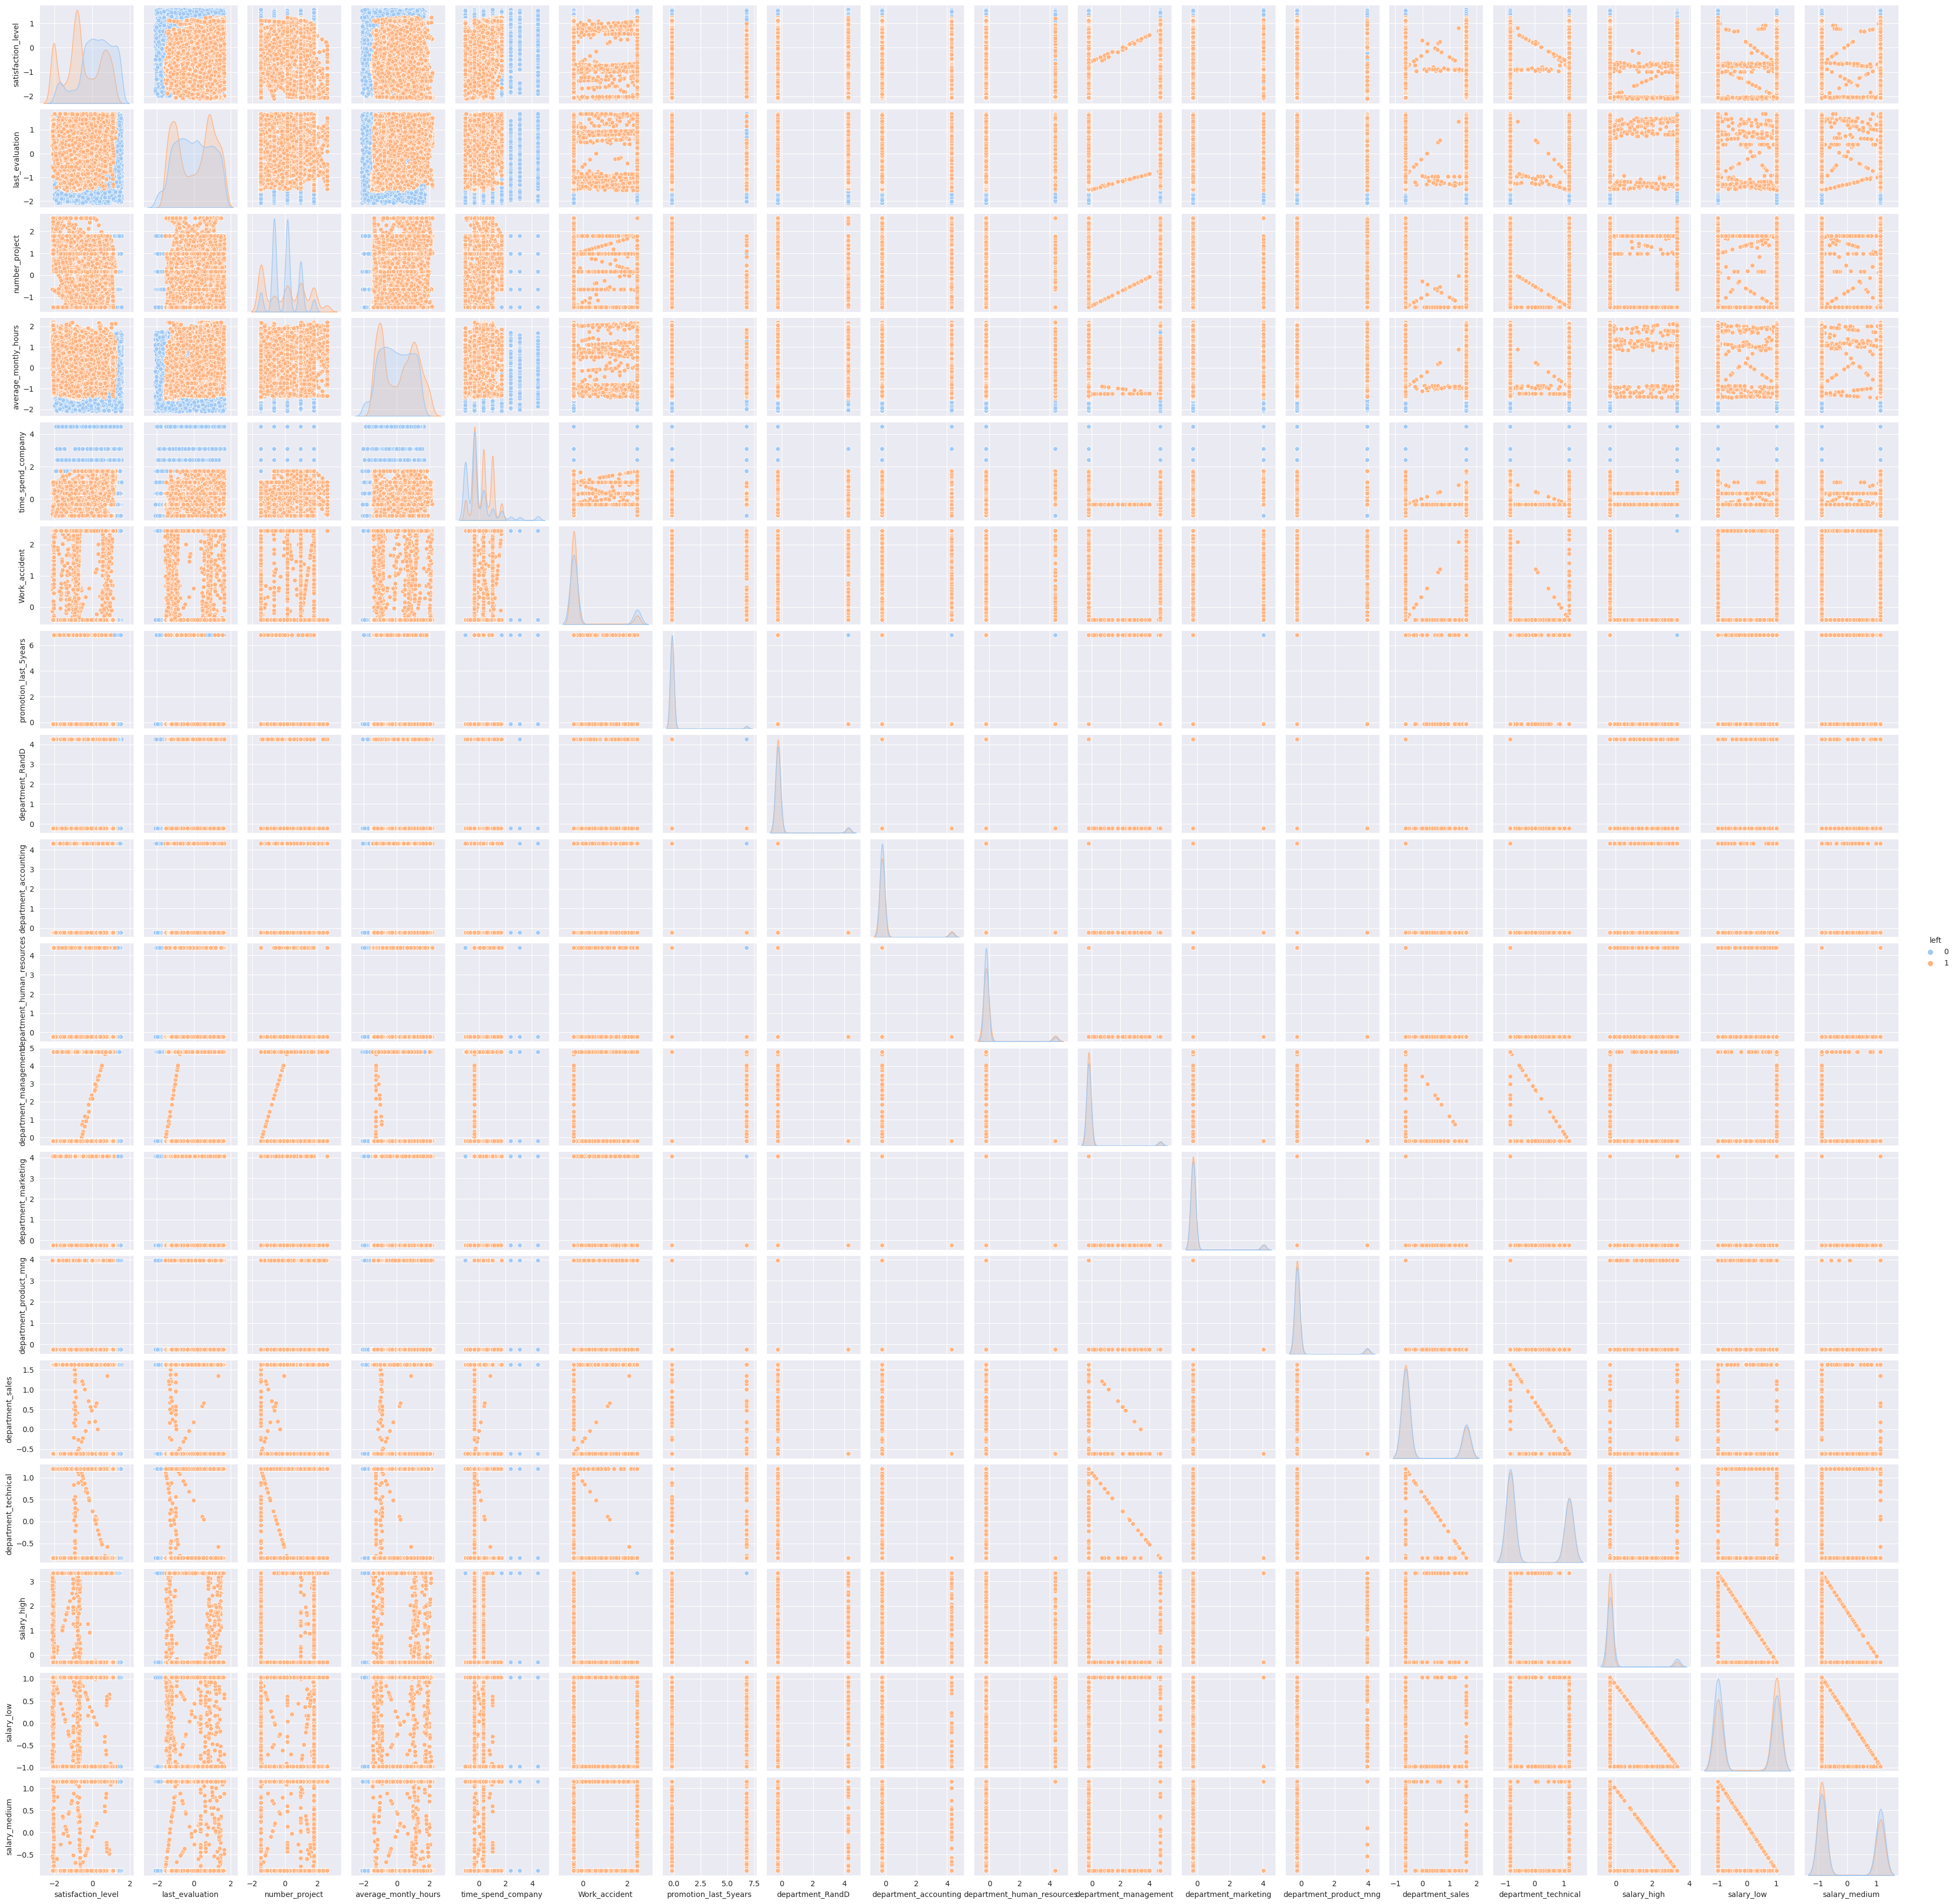

In [14]:
# Prendiamo visualizzazione di quello che è successo hai dati dopo la tecnica con ADASYN
data_balance_adasyn_plot = sns.pairplot(data_balance_adasyn, hue='left', height=2)

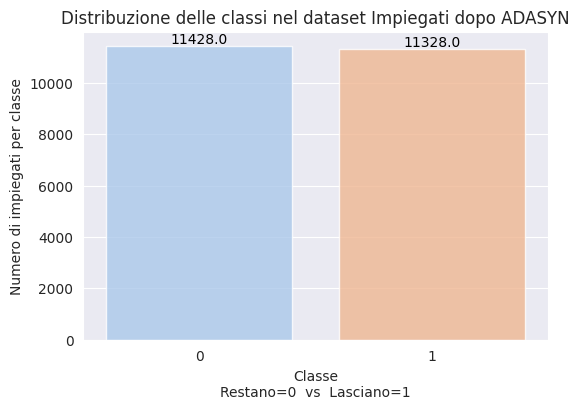

In [16]:
# andiamo a definire su quale colonna eseguire il conteggio degli esempi per classe
class_counts_adasyn = data_balance_adasyn['left'].value_counts()

# Crea un barplot per mostrare lo sbilanciamento tra le classi dopo lo ADASYN
plot_class_distribution(class_counts_adasyn, 'Distribuzione delle classi nel dataset Impiegati dopo ADASYN')

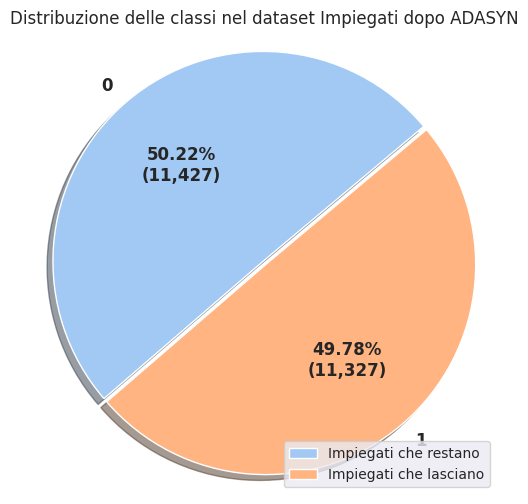

In [17]:
plot_pie_chart(class_counts_adasyn, 'Distribuzione delle classi nel dataset Impiegati dopo ADASYN', legend_labels, startangle=40, fontsize=12, fontweight='bold')

### Addastramento di modelli di machine learning dopo ADASYN
Andremo ad addestrare due modelli da confrontare tra di loro per vedere come si comportano su questo nuovo data set e quanto lo ADASYN ha potuto incidere sul miglioramento o meno dell'apprendimento.

In [54]:
# Utilizziamo il data set creato con ADASYN e lo dividiamo in input e target
X_adaSYN = data_balance_adasyn.drop(columns=["left"])
y_adaSYN = data_balance_adasyn["left"]

In [56]:
# Andiamo a suddividere il dataset in train set e test sewt con un hold-out 70:30
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn  = train_test_split (X_adaSYN , y_adaSYN , test_size=0.3, random_state=110)

# verifica del hold out
print("X_train shape: ", X_train_adasyn.shape)
print("X_test shape: ", X_test_adasyn.shape)
print("y_train.shape: ", y_train_adasyn.shape)
print("y_test shape: ", y_test_adasyn.shape)

X_train shape:  (15929, 18)
X_test shape:  (6827, 18)
y_train.shape:  (15929,)
y_test shape:  (6827,)


In [57]:
# istanziazzione dei modelli da mettere a confronto logistic regression vs gaussian naive bayes
log_reg_adasyn = LogisticRegression()
gauNb_adasyn = GaussianNB()

# adestramento base su hold-out per regressione logistica
log_reg_adasyn .fit(X_train_adasyn, y_train_adasyn)
pred_log_reg_adasyn  = log_reg_adasyn.predict(X_test_adasyn)

# addestramento base su hold-out per gaussian naive bayes
gauNb_adasyn.fit(X_train_adasyn, y_train_adasyn)
pred_gauNb_adasyn = gauNb_adasyn.predict(X_test_adasyn)

In [58]:
print("_____________LOGISTIC REGRESSION ON ADASYN______________")
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test_adasyn, pred_log_reg_adasyn ))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test_adasyn, pred_log_reg_adasyn ))

_____________LOGISTIC REGRESSION ON ADASYN______________
------------------------Accuracy------------------------

0.6931302182510619

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      3446
           1       0.69      0.69      0.69      3381

    accuracy                           0.69      6827
   macro avg       0.69      0.69      0.69      6827
weighted avg       0.69      0.69      0.69      6827



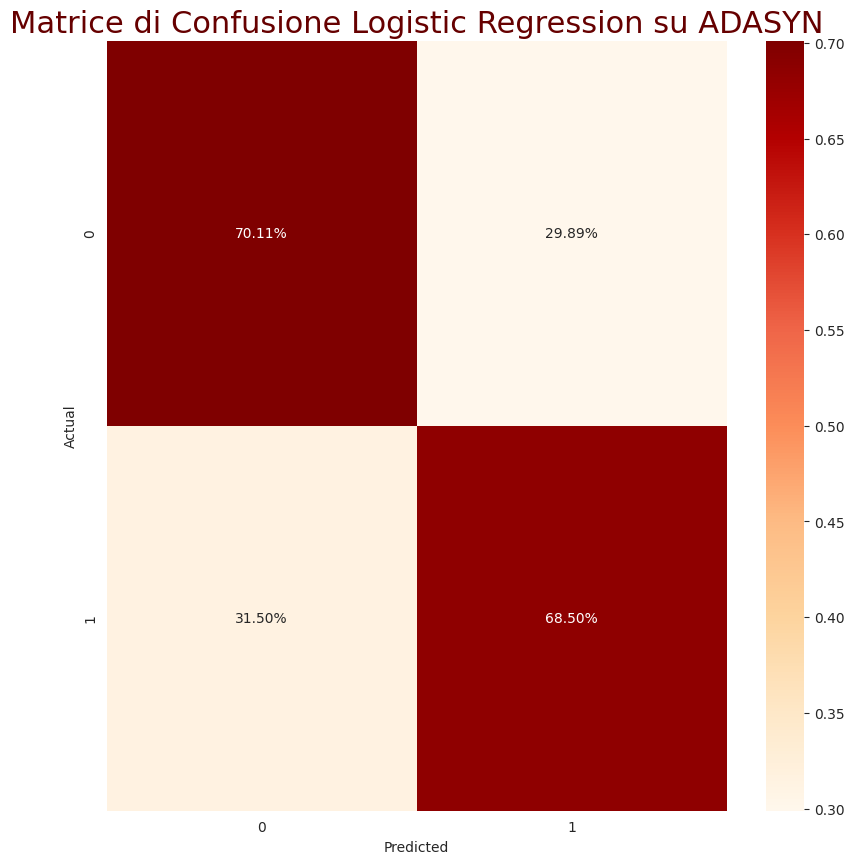

In [94]:
plot_confusion_matrix(y_test_adasyn, pred_log_reg_adasyn , "Matrice di Confusione Logistic Regression su ADASYN")

In [60]:
print("_____________GAUSSIAN NAIVE BAYESA ON ADASYN____________")
print("------------------------Accuracy------------------------")
print()
print(accuracy_score(y_test_adasyn, pred_gauNb_adasyn))
print()
print("------------------Classification_Report-----------------")
print()
print(classification_report(y_test_adasyn, pred_gauNb_adasyn))

_____________GAUSSIAN NAIVE BAYESA ON ADASYN____________
------------------------Accuracy------------------------

0.6863922660026366

------------------Classification_Report-----------------

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3446
           1       0.69      0.68      0.68      3381

    accuracy                           0.69      6827
   macro avg       0.69      0.69      0.69      6827
weighted avg       0.69      0.69      0.69      6827



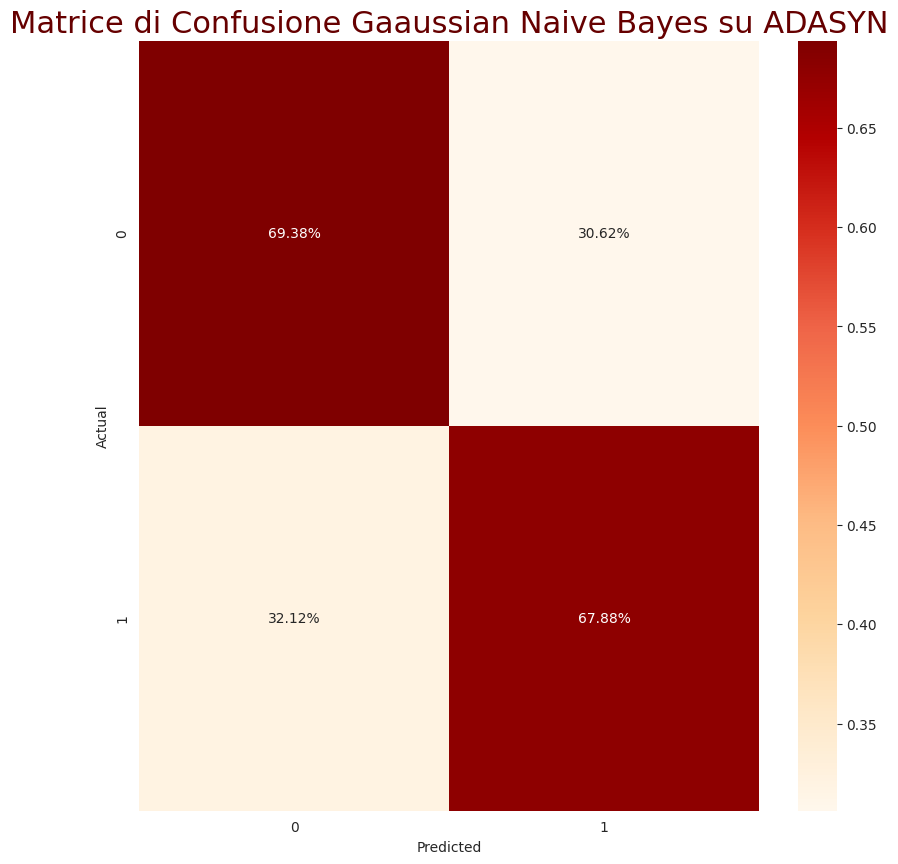

In [95]:
plot_confusion_matrix(y_test_adasyn, pred_gauNb_adasyn, "Matrice di Confusione Gaaussian Naive Bayes su ADASYN")

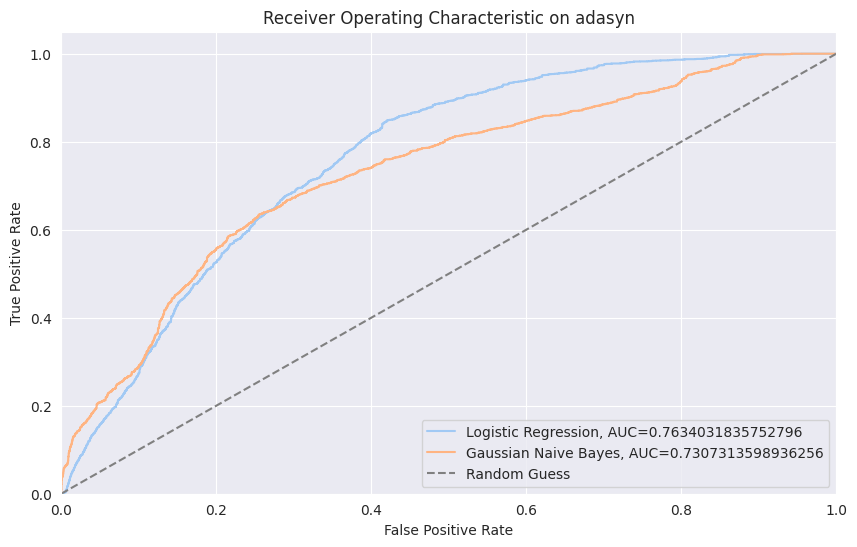

In [63]:
# Calcola i punteggi delle probabilità positive
pred_log_reg_adasyn_positive =log_reg_adasyn.predict_proba(X_test_adasyn)[:, 1]
pred_gauNb_adasyn_positive = gauNb_adasyn.predict_proba(X_test_adasyn)[:, 1]

# Calcola le curve ROC e gli AUC
fpr_log_reg_adasyn, tpr_log_reg_adasyn, _ = roc_curve(y_test_adasyn , pred_log_reg_adasyn_positive)
auc_log_reg_adasyn = roc_auc_score(y_test_adasyn , pred_log_reg_adasyn_positive)

fpr_gauNb_adasyn, tpr_gauNb_adasyn, _ = roc_curve(y_test_adasyn , pred_gauNb_adasyn_positive)
auc_gauNb_adasyn = roc_auc_score(y_test_adasyn, pred_gauNb_adasyn_positive)

# Crea il grafico ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg_adasyn, tpr_log_reg_adasyn, label="Logistic Regression, AUC=" + str(auc_log_reg_adasyn))
plt.plot(fpr_gauNb_adasyn, tpr_gauNb_adasyn, label="Gaussian Naive Bayes, AUC=" + str(auc_gauNb_adasyn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic on adasyn')
plt.legend(loc='lower right')
plt.show()

Andaimo a confrontare i due modelli sulle due tecniche di campionamento eseguite per confrontarli useremo un plot ROC e lo score AUROC.

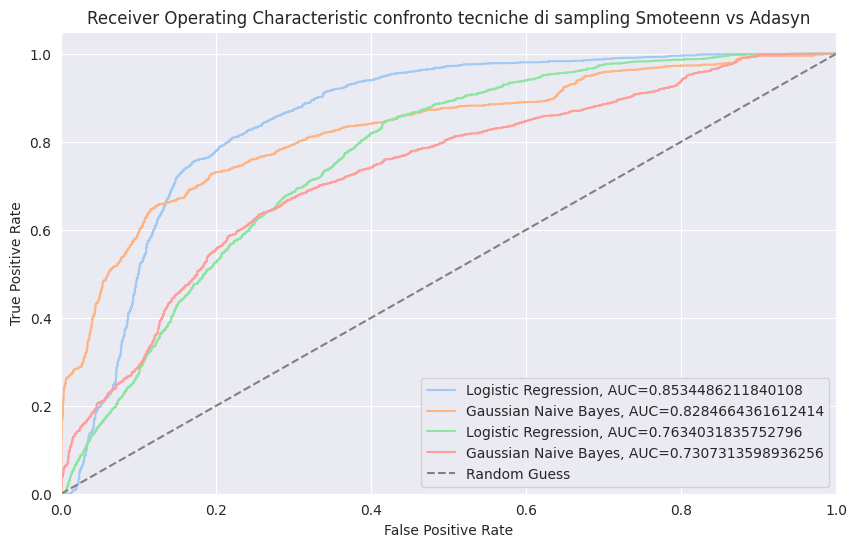

In [65]:
# Crea il grafico ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label="Logistic Regression, AUC=" + str(auc_log_reg))
plt.plot(fpr_gauNb, tpr_gauNb, label="Gaussian Naive Bayes, AUC=" + str(auc_gauNb))
plt.plot(fpr_log_reg_adasyn, tpr_log_reg_adasyn, label="Logistic Regression, AUC=" + str(auc_log_reg_adasyn))
plt.plot(fpr_gauNb_adasyn, tpr_gauNb_adasyn, label="Gaussian Naive Bayes, AUC=" + str(auc_gauNb_adasyn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic confronto tecniche di sampling Smoteenn vs Adasyn')
plt.legend(loc='lower right')
plt.show()